<a href="https://colab.research.google.com/github/rajasreekalli/Data-Visualization/blob/main/New_challenge_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [6]:
# Checking for data types

df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
# checking for duplicates

df.duplicated().any()

False

In [8]:
print('Missing data:\n', df.isna().sum())
print('\n')
print('Duplicates:', df.duplicated().sum())

Missing data:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Duplicates: 0


In [9]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

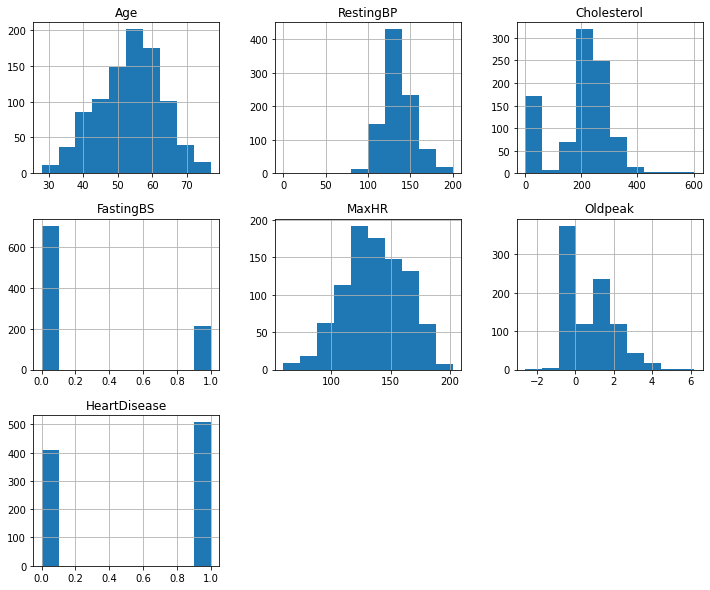

In [10]:
df.hist(figsize=(12,10))
plt.show()

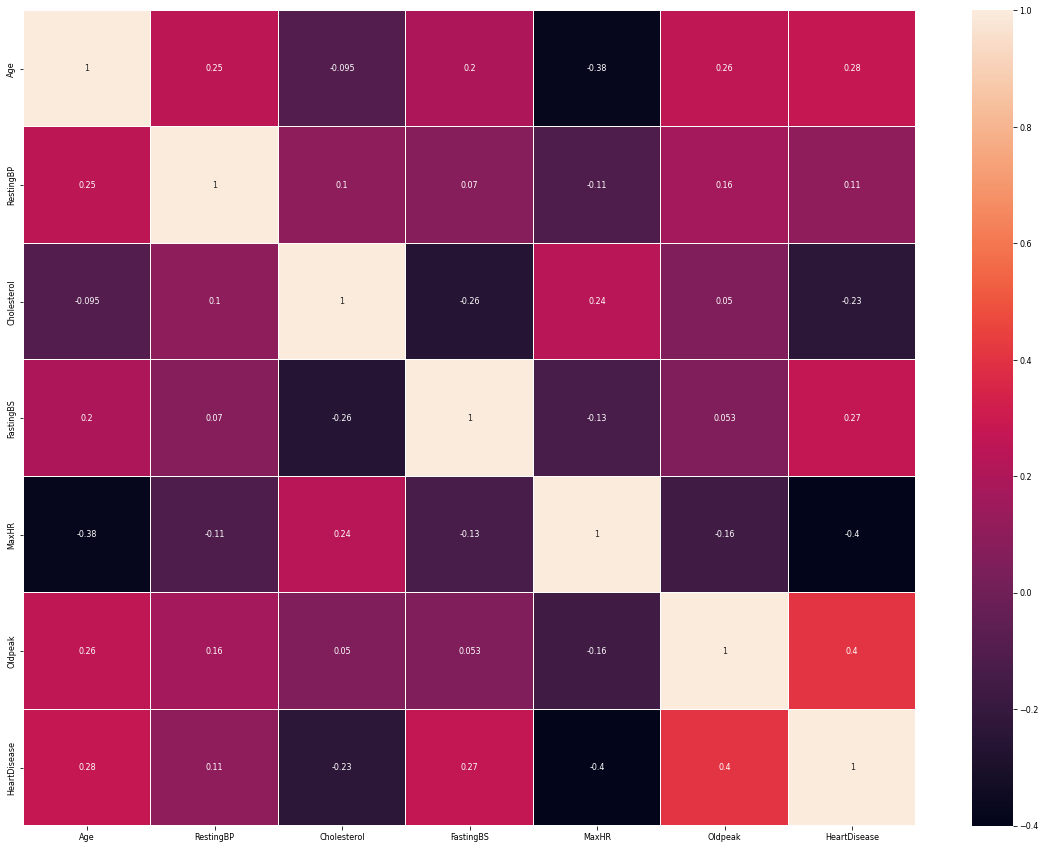

In [11]:
corr = df.corr()
plt.rcParams.update({'font.size': 8})
plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot =True,linewidths=.1);

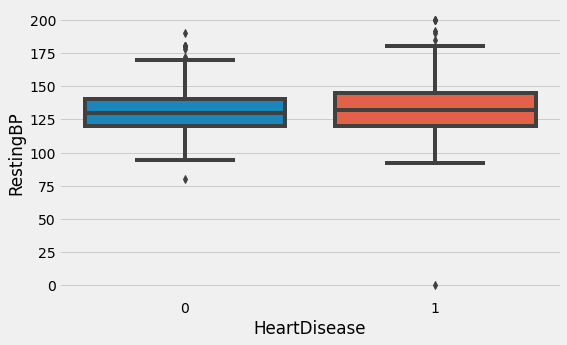

In [12]:
plt.rcParams.update({'font.size': 10})
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(8, 5)) 
sns.boxplot(data = df, x='HeartDisease', y = "RestingBP")

In the boxplot we can see the who are having the heartDisease they are having the little bit high RestingBP.

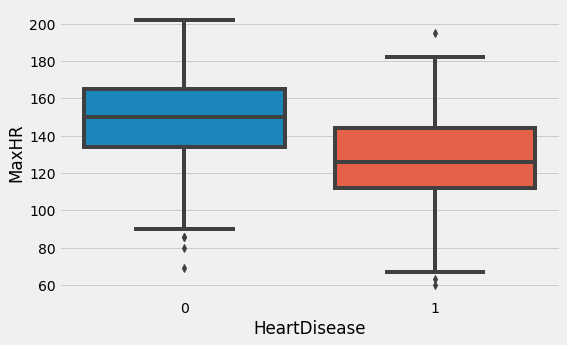

In [13]:
plt.rcParams.update({'font.size': 10})
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(8, 5)) 
sns.boxplot(data = df, x='HeartDisease', y = "MaxHR")

In the above boxplot we can see the who are having the no HeartDisease they are having the high MaxHR.

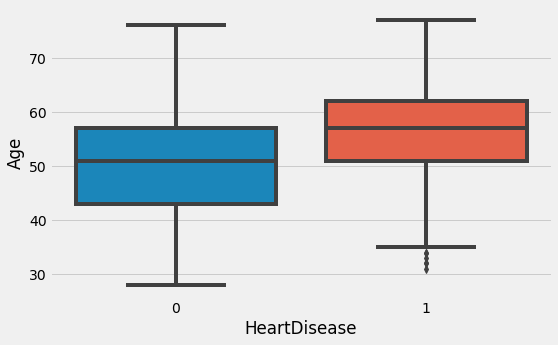

In [15]:
plt.rcParams.update({'font.size': 10})
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(8, 5)) 
sns.boxplot(data = df, x='HeartDisease', y = "Age")

In [16]:
X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [18]:
num_select = make_column_selector(dtype_include='number')
cat_select = make_column_selector(dtype_include='object')
mean_imput= SimpleImputer(strategy='median')
freq_imput = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
num_pipe = make_pipeline(mean_imput, scaler)
cat_pipe = make_pipeline(freq_imput, encoder)
num_tuple = (num_pipe, num_select)
cat_tuple = (cat_pipe, cat_select)
column_transform = make_column_transformer(num_tuple,cat_tuple)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
knn = KNeighborsClassifier()
knnpipe = make_pipeline(column_transform,knn)
knnpipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fbef28b1850>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                              

In [21]:
print('classification report for test set')
test_reportknn = classification_report(y_test,knnpipe.predict(X_test))
print(test_reportknn)

classification report for test set
              precision    recall  f1-score   support

           0       0.85      0.84      0.84        97
           1       0.88      0.89      0.89       133

    accuracy                           0.87       230
   macro avg       0.87      0.86      0.87       230
weighted avg       0.87      0.87      0.87       230



In [22]:
print('Testing accuracy:', knnpipe.score(X_test, y_test))
print('Training accuracy:',knnpipe.score(X_train,y_train))

Testing accuracy: 0.8695652173913043
Training accuracy: 0.8909883720930233


In [23]:
print('confusion matrix of test set')
test_matrix = confusion_matrix(y_test,knnpipe.predict(X_test))
print(test_matrix)

confusion matrix of test set
[[ 81  16]
 [ 14 119]]


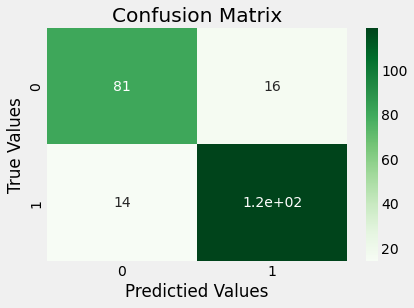

In [24]:
sns.heatmap(test_matrix,annot=True,cmap = 'Greens')
plt.ylabel('True Values')
plt.xlabel('Predictied Values')
plt.title('Confusion Matrix')
plt.show()

In [25]:
# Hypertuning

param = {'kneighborsclassifier__n_neighbors': range(10,20),'kneighborsclassifier__p': [2,3,4]}

In [26]:
grid = GridSearchCV(knnpipe,param,cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fbef28b1850>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                             

In [27]:
log = LogisticRegression()
logpipe = make_pipeline(column_transform,log)
logpipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fbef28b1850>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                              

In [28]:
print('classification report for training set')
train_report = classification_report(y_train,logpipe.predict(X_train))
print(train_report)

print('classification report for test set')
test_report = classification_report(y_test,logpipe.predict(X_test))
print(test_report)

classification report for training set
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       313
           1       0.88      0.88      0.88       375

    accuracy                           0.87       688
   macro avg       0.87      0.87      0.87       688
weighted avg       0.87      0.87      0.87       688

classification report for test set
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        97
           1       0.89      0.89      0.89       133

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



In [29]:
print('Testing accuracy:', logpipe.score(X_test, y_test))
print('Training accuracy:',logpipe.score(X_train,y_train))

Testing accuracy: 0.8695652173913043
Training accuracy: 0.8677325581395349


In [30]:
# Hypertuning

logpipe.get_params()

{'columntransformer': ColumnTransformer(transformers=[('pipeline-1',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fbef28b1850>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))]),
                                  <sklearn.compose._column_transfo

In [31]:
param_grid  = {'logisticregression__penalty' : ['l1', 'l2', 'elasticnet'],
      'logisticregression__C': [1, 0.01, 0.1],'logisticregression__solver':['newton-cg', 'lbfgs', 'liblinear']}

In [32]:
loggrid = GridSearchCV(logpipe,param_grid,cv = 5)
loggrid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fbef28b1850>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                             

In [33]:
print('classification report for training set')
train_report = classification_report(y_train,loggrid.predict(X_train))
print(train_report)

print('classification report for test set')
test_report = classification_report(y_test,loggrid.predict(X_test))
print(test_report)

classification report for training set
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       313
           1       0.87      0.89      0.88       375

    accuracy                           0.86       688
   macro avg       0.86      0.86      0.86       688
weighted avg       0.86      0.86      0.86       688

classification report for test set
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        97
           1       0.89      0.88      0.89       133

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



In [34]:
print('Testing accuracy:', loggrid.score(X_test, y_test))
print('Training accuracy:',loggrid.score(X_train,y_train))

Testing accuracy: 0.8695652173913043
Training accuracy: 0.8648255813953488


In [35]:
from xgboost import XGBClassifier

In [36]:
xgb = XGBClassifier()
xgbpipe = make_pipeline(column_transform,xgb)
xgbpipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fbef28b1850>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                              

In [37]:
print('classification report for training set')
train_report = classification_report(y_train,xgbpipe.predict(X_train))
print(train_report)

print('classification report for test set')
test_report = classification_report(y_test,xgbpipe.predict(X_test))
print(test_report)

classification report for training set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       313
           1       0.94      0.96      0.95       375

    accuracy                           0.95       688
   macro avg       0.95      0.94      0.95       688
weighted avg       0.95      0.95      0.95       688

classification report for test set
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        97
           1       0.89      0.89      0.89       133

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



In [38]:
print('Testing accuracy:', xgbpipe.score(X_test, y_test))
print('Training accuracy:',xgbpipe.score(X_train,y_train))

Testing accuracy: 0.8739130434782608
Training accuracy: 0.9462209302325582


In [39]:
param_test = {'xgbclassifier__n_estimators':[2,8,9,10,15,20],
               'xgbclassifier__max_depth':range(10,20,25,)}
xgbgrid = GridSearchCV(xgbpipe,param_grid=param_test);
xgbgrid.fit(X_train,y_train)
best_param = xgbgrid.best_params_
best_param

{'xgbclassifier__max_depth': 10, 'xgbclassifier__n_estimators': 9}

In [40]:
print('classification report for training set')
train_report = classification_report(y_train,xgbgrid.predict(X_train))
print(train_report)

print('classification report for test set')
test_report = classification_report(y_test,xgbgrid.predict(X_test))
print(test_report)

classification report for training set
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       313
           1       0.93      0.96      0.94       375

    accuracy                           0.94       688
   macro avg       0.94      0.94      0.94       688
weighted avg       0.94      0.94      0.94       688

classification report for test set
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        97
           1       0.84      0.85      0.84       133

    accuracy                           0.82       230
   macro avg       0.81      0.81      0.81       230
weighted avg       0.82      0.82      0.82       230



In [41]:
print('Testing accuracy:', xgbgrid.score(X_test, y_test))
print('Training accuracy:',xgbgrid.score(X_train,y_train))

Testing accuracy: 0.8173913043478261
Training accuracy: 0.938953488372093


Based on the data set  logistic regression and kneihbours are having good test scores. These scores less overfitting and better scores than all other algorithms. I recommand the Logistic regression and KNeighbors are best production models in this dataset.
